In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
filename = "conflict_data_acled_2018_2021.csv"

In [4]:
df = pd.read_csv(filename)

array([[<AxesSubplot:title={'center':'event_date'}>]], dtype=object)

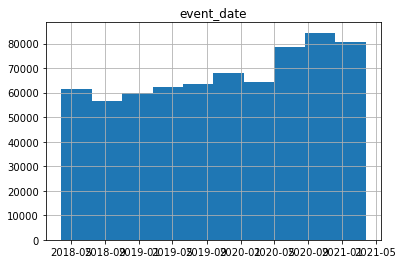

In [92]:
df.hist("event_date")

<AxesSubplot:xlabel='event_date'>

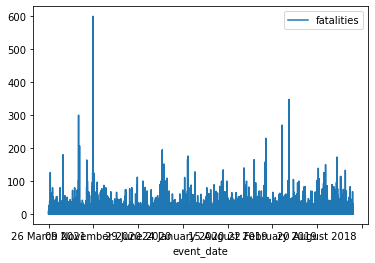

In [8]:
df.plot("event_date", "fatalities")

In [37]:
df["event_date"]= pd.to_datetime(df["event_date"], infer_datetime_format=True)   # Convert date strings to dates
df["day"] = df.event_date.dt.day        # Separate day into own column
df["month"] = df.event_date.dt.month    # Separate month into own column

In [38]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3', 'Day',
       'Month', 'day', 'month'],
      dtype='object')

In [56]:
grouped = df.groupby(["month", "year"]).sum()                                    # Group events by month, sum up
time_period = [str(ind[0]) + " " + str(ind[1]) for ind in grouped.index]         # Put date back into groups in plotabale format
grouped["time_period"] = pd.to_datetime(time_period, format="%m %Y")

<AxesSubplot:xlabel='time_period'>

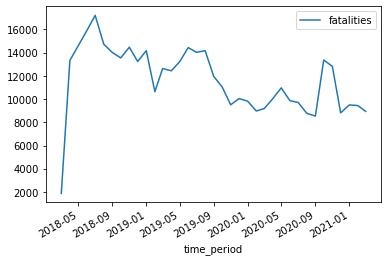

In [58]:
grouped.plot("time_period", "fatalities")

## Repeat Offenders
Take top 5 names which appear most often as actors

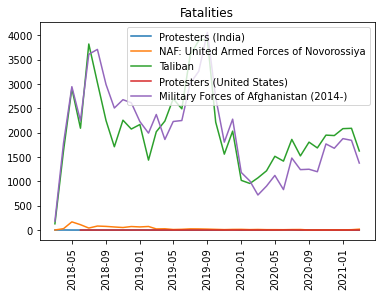

In [94]:
actors = pd.concat([df.actor1, df.actor2, df.assoc_actor_1, df.assoc_actor_2]) # Combine all columns
actors.dropna() 
top_five = actors.value_counts().iloc[:5] # Take five names which appear most

for actor in top_five.index:
    cond = (df.actor1 == actor) | (df.actor2 == actor) | (df.assoc_actor_1 == actor) | (df.assoc_actor_2 == actor) 
    df_set = df[cond]  # Select only them
    group_set = df_set.groupby(["month", "year"]).sum() # Add up everything by month
    time_period = [str(ind[0]) + " " + str(ind[1]) for ind in group_set.index] 
    group_set["time_period"] = pd.to_datetime(time_period, format="%m %Y") # Put month back in for plotting
    group_set.sort_values("time_period", inplace=True)
    pyplot.plot(group_set["time_period"], group_set["fatalities"], label=actor)  # Plot fatalities per month for this actor
    
pyplot.legend()
pyplot.title("Fatalities")
pyplot.xticks(rotation = 90)
pyplot.show()

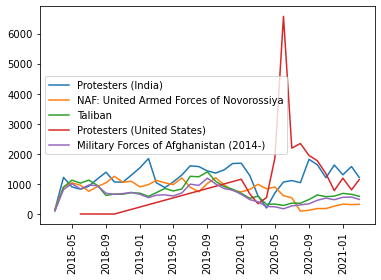

In [91]:
for actor in top_five.index:
    cond = (df.actor1 == actor) | (df.actor2 == actor) | (df.assoc_actor_1 == actor) | (df.assoc_actor_2 == actor)
    df_set = df[cond]
    group_set = df_set.groupby(["month", "year"]).count()                         # Count number of events with this actor
    time_period = [str(ind[0]) + " " + str(ind[1]) for ind in group_set.index]    
    group_set["time_period"] = pd.to_datetime(time_period, format="%m %Y")
    group_set.sort_values("time_period", inplace=True)
    pyplot.plot(group_set["time_period"], group_set["day"], label=actor)          # Plot number of events per month
    
pyplot.legend()
pyplot.xticks(rotation = 90)
pyplot.show()

(array([35000., 39691., 35679., 34389., 36459., 49114., 45945., 47999.,
        51822., 53639.]),
 array([   0. ,  109.5,  219. ,  328.5,  438. ,  547.5,  657. ,  766.5,
         876. ,  985.5, 1095. ]),
 <BarContainer object of 10 artists>)

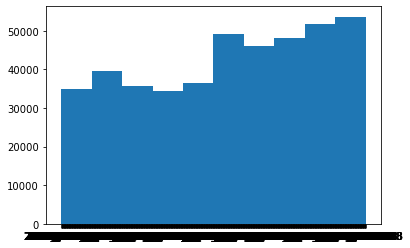

In [13]:
#df.hist("event_date", weights="fatalities")
pyplot.hist(df.event_date, weights=df.fatalities, bins=36)

<AxesSubplot:xlabel='year'>

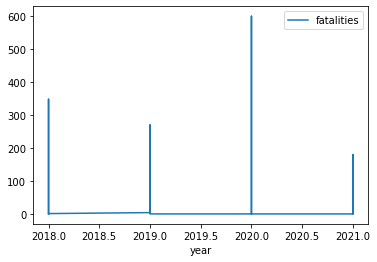

In [9]:
df.plot("year", "fatalities")